In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

import tensorflow as tf
import keras 
from keras.preprocessing.image import load_img
import string
import time
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.models import Model
from tensorflow.keras import layers
from tensorflow.keras import activations
from tensorflow.keras import Input
from PIL import Image

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report

#used for creating Progress Meters or Progress Bars
from tqdm import tqdm

In [2]:
!pip install wordcloud
!pip install gtts
!pip install playsound

In [4]:
import glob
from gtts import gTTS
from playsound import playsound
from IPython import display

import collections
import wordcloud
from wordcloud import WordCloud, STOPWORDS

In [5]:
images='/Users/Flickr8k_Dataset/Flicker8k_Dataset/'

all_imgs = glob.glob(images + '/*.jpg',recursive=True)
print("The total images present in the dataset: {}".format(len(all_imgs)))

The total images present in the dataset: 8091


C:\Users\aniru\AppData\Local\Temp\ipykernel_15548\2642698823.py:10: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  ax.imshow(imageio.imread(image), cmap=None)


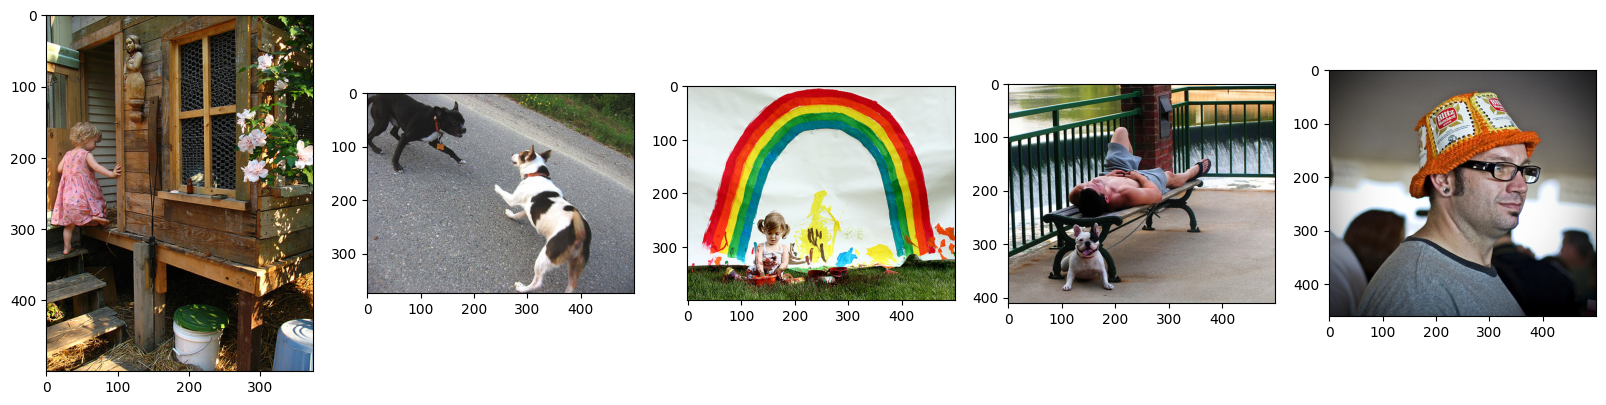

In [6]:
import imageio

#Visualising first 5 images :

Display_Images = all_imgs[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(20)

for ax, image in zip(axes, Display_Images):
  ax.imshow(imageio.imread(image), cmap=None)

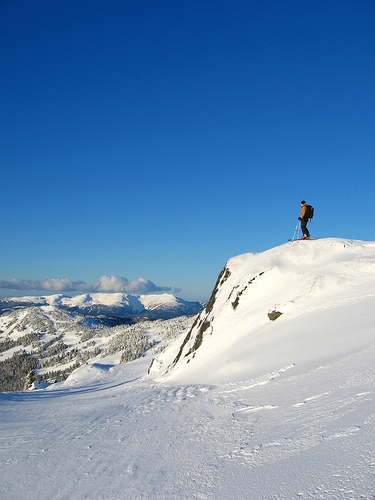

In [7]:
import random
Image.open(all_imgs[random.randrange(40, 60, 3)])

In [9]:
text_file = "/Users/captions.txt"

def load_doc(filename):
    
    #your code here
    open_file = open(text_file, 'r', encoding='latin-1' ) #returns a file object
    text = open_file.read() #reads contents of the file
    open_file.close()
    #print(text)
    
    return text

doc = load_doc(text_file)
print(doc[:300])

image,caption
1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set of stairs in an entry way .
1000268201_693b08cb0e.jpg,A girl going into a wooden building .
1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
1000268201_693b08cb0e.jpg,A little girl climbing


In [10]:
img_path = '/Users/Flickr8k_Dataset/Flicker8k_Dataset/'

all_img_id = [] #store all the image id here
all_img_vector = [] #store all the image path here
annotations = [] #store all the captions here

with open("/Users/captions.txt", 'r') as fo:
  next(fo) #to skip the heading
  for line in fo :
    split_arr = line.split(',')
    all_img_id.append(split_arr[0])
    annotations.append(split_arr[1].rstrip('\n.')) #removing out the \n.
    all_img_vector.append(img_path+split_arr[0])

df = pd.DataFrame(list(zip(all_img_id, all_img_vector,annotations)),columns =['ID','Path', 'Captions']) 
    
df

ID  \
0      1000268201_693b08cb0e.jpg   
1      1000268201_693b08cb0e.jpg   
2      1000268201_693b08cb0e.jpg   
3      1000268201_693b08cb0e.jpg   
4      1000268201_693b08cb0e.jpg   
...                          ...   
40450   997722733_0cb5439472.jpg   
40451   997722733_0cb5439472.jpg   
40452   997722733_0cb5439472.jpg   
40453   997722733_0cb5439472.jpg   
40454   997722733_0cb5439472.jpg   

                                                    Path  \
0      /Users/Flickr8k_Dataset/Flicker8k_Dataset/1000...   
1      /Users/Flickr8k_Dataset/Flicker8k_Dataset/1000...   
2      /Users/Flickr8k_Dataset/Flicker8k_Dataset/1000...   
3      /Users/Flickr8k_Dataset/Flicker8k_Dataset/1000...   
4      /Users/Flickr8k_Dataset/Flicker8k_Dataset/1000...   
...                                                  ...   
40450  /Users/Flickr8k_Dataset/Flicker8k_Dataset/9977...   
40451  /Users/Flickr8k_Dataset/Flicker8k_Dataset/9977...   
40452  /Users/Flickr8k_Dataset/Flicker8k_Dataset/9977...   
40453  /Users/Flickr8k_Dataset/Flicker8k_Dataset/9977...   
40454  /Users/Flickr8k_Dataset/Flicker8k_Dataset/9977...   

                                                Captions  
0      A child in a pink dress is climbing up a set o...  
1                   A girl going into a wooden building   
2        A little girl climbing into a wooden playhouse   
3      A little girl climbing the stairs to her playh...  
4      A little girl in a pink dress going into a woo...  
...                                                  ...  
40450           A man in a pink shirt climbs a rock face  
40451            A man is rock climbing high in the air   
40452  A person in a red shirt climbing up a rock fac...  
40453                     A rock climber in a red shirt   
40454  A rock climber practices on a rock climbing wall   

[40455 rows x 3 columns]

In [11]:
len (annotations)

40455

In [12]:
type (annotations)

list

In [13]:
#check total captions and images present in dataset

print("Total captions present in the dataset: "+ str(len(annotations)))
print("Total images present in the dataset: " + str(len(all_imgs)))

Total captions present in the dataset: 40455
Total images present in the dataset: 8091


In [14]:
#Create the vocabulary & the counter for the captions
#lower() used to ensure same count irrespective of an alphabet's case

vocabulary = [word.lower() for line in annotations for word in line.split()]

val_count = Counter(vocabulary) 
val_count

Counter({'a': 60196,
         'in': 18174,
         'the': 17507,
         'on': 10357,
         'is': 9069,
         'and': 8057,
         'dog': 7948,
         'with': 7304,
         'man': 7137,
         'of': 6495,
         'two': 5132,
         'white': 3706,
         'black': 3620,
         'boy': 3514,
         'are': 3365,
         'woman': 3304,
         'girl': 3277,
         'to': 3005,
         'wearing': 2916,
         'people': 2811,
         'at': 2810,
         'water': 2676,
         'young': 2587,
         'red': 2553,
         'brown': 2457,
         'an': 2325,
         'his': 2255,
         'blue': 2125,
         'dogs': 2095,
         'running': 1996,
         'through': 1978,
         'playing': 1954,
         'while': 1807,
         'down': 1755,
         'little': 1736,
         'shirt': 1735,
         'standing': 1702,
         'ball': 1678,
         'grass': 1565,
         'person': 1515,
         'child': 1507,
         'snow': 1439,
         'jumping': 1430

a :  60196
in :  18174
the :  17507
on :  10357
is :  9069
and :  8057
dog :  7948
with :  7304
man :  7137
of :  6495
two :  5132
white :  3706
black :  3620
boy :  3514
are :  3365
woman :  3304
girl :  3277
to :  3005
wearing :  2916
people :  2811
at :  2810
water :  2676
young :  2587
red :  2553
brown :  2457
an :  2325
his :  2255
blue :  2125
dogs :  2095
running :  1996


Text(0, 0.5, 'Count')

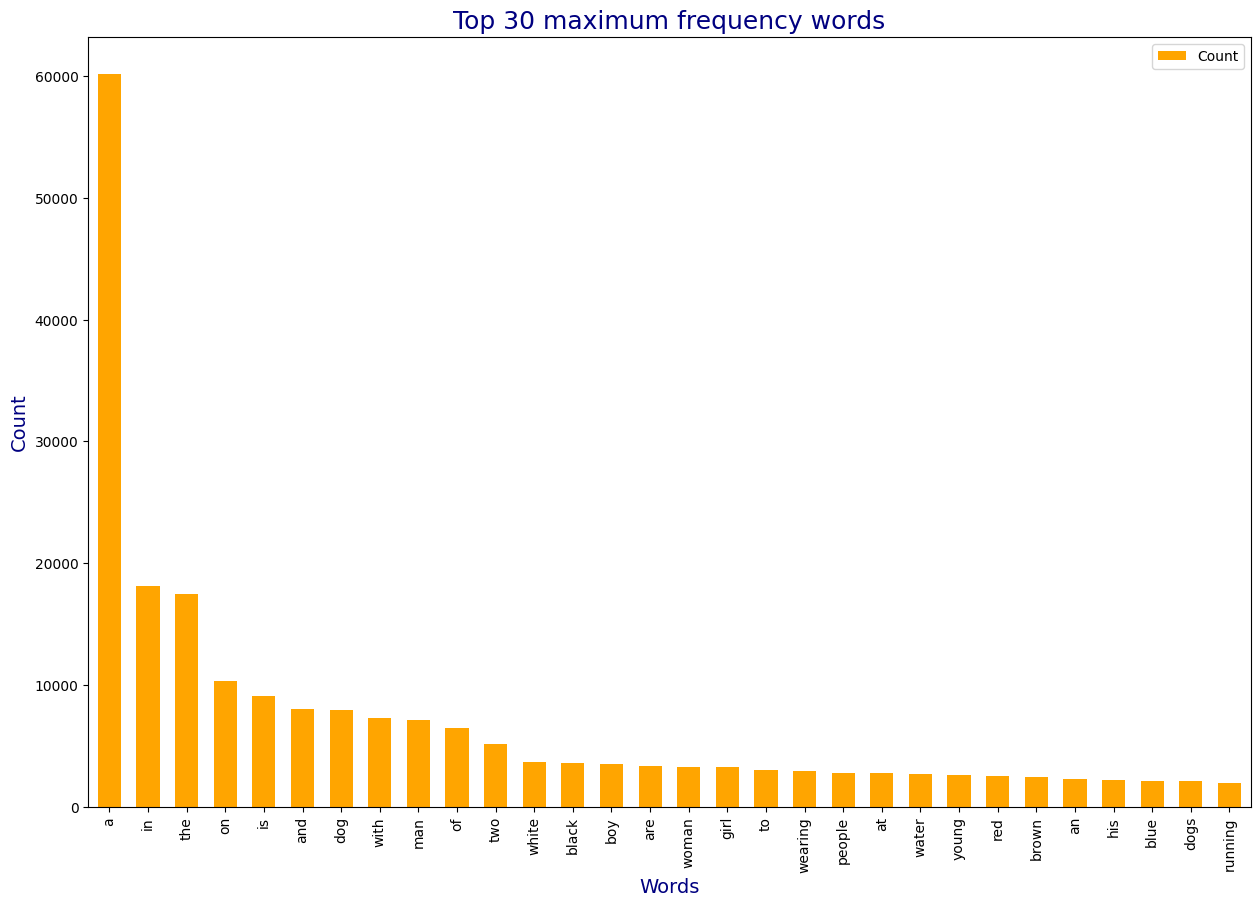

In [15]:
#Visualise the top 30 occuring words in the captions

#write your code here
for word, count in val_count.most_common(30):
  print(word, ": ", count)

lst = val_count.most_common(30)
most_common_words_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
most_common_words_df.plot.bar(x='Word', y='Count', width=0.6, color='orange', figsize=(15, 10))
plt.title("Top 30 maximum frequency words", fontsize = 18, color= 'navy')
plt.xlabel("Words", fontsize = 14, color= 'navy')
plt.ylabel("Count", fontsize = 14, color= 'navy')

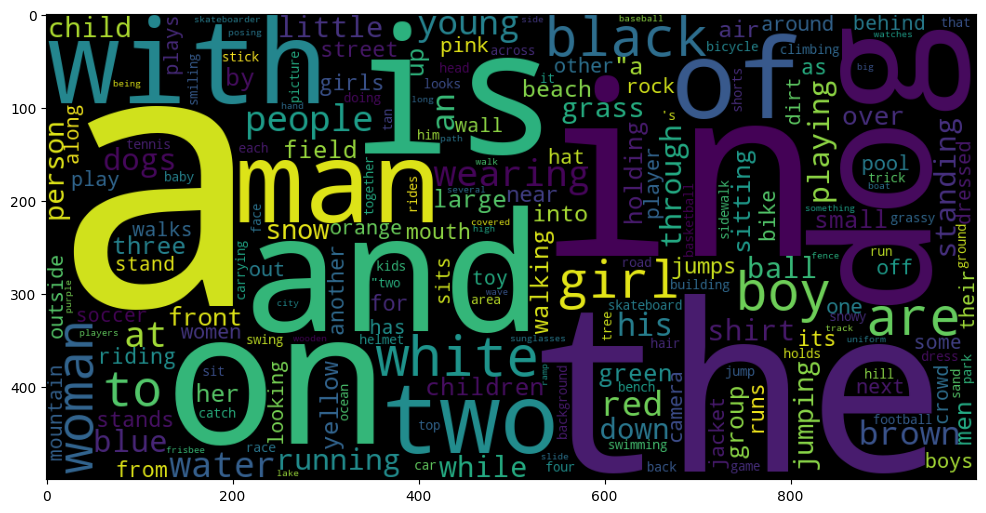

In [16]:
## check out the top 30 stopwords with higher frequency

wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(val_count)
plt.figure(figsize = (12, 12))
plt.imshow(wordcloud)

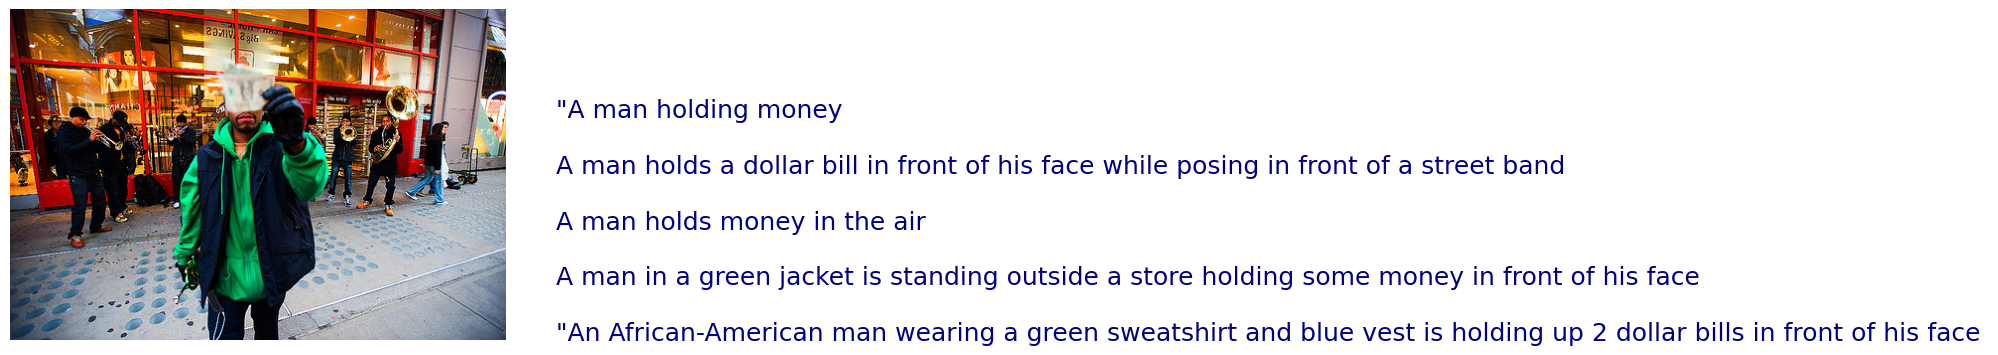

In [17]:
def caption_with_img_plot(image_id, frame) :
  #get the captions
  capt = ("\n" *2).join(frame[frame['ID'] == image_id].Captions.to_list())
  fig, ax = plt.subplots()
  ax.set_axis_off()
  idx = df.ID.to_list().index(image_id)
  im =  Image.open(df.Path.iloc[idx])
  w, h = im.size[0], im.size[-1]
  ax.imshow(im)
  ax.text(w+50, h, capt, fontsize = 18, color = 'navy')
caption_with_img_plot(df.ID.iloc[8049], df)

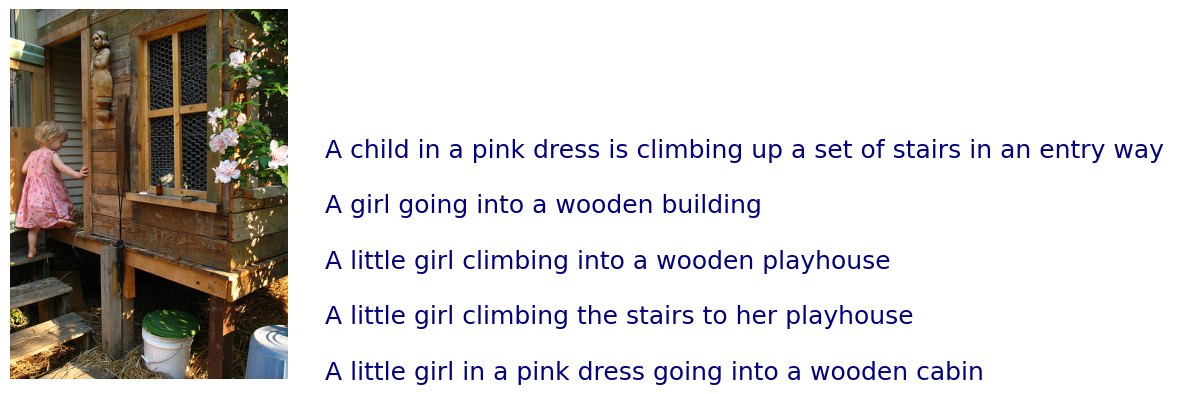

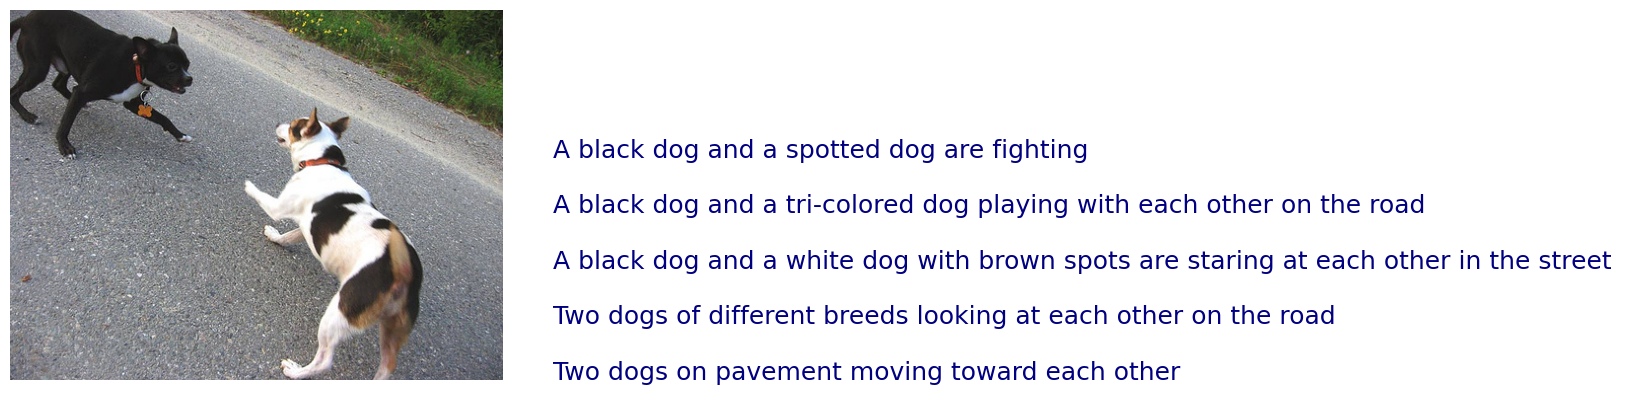

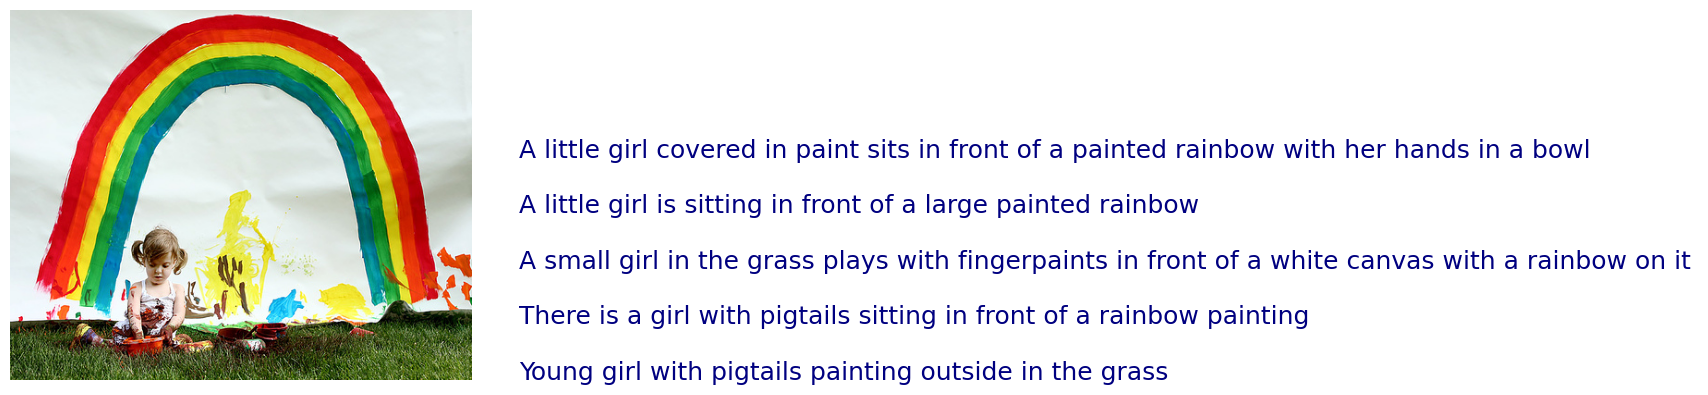

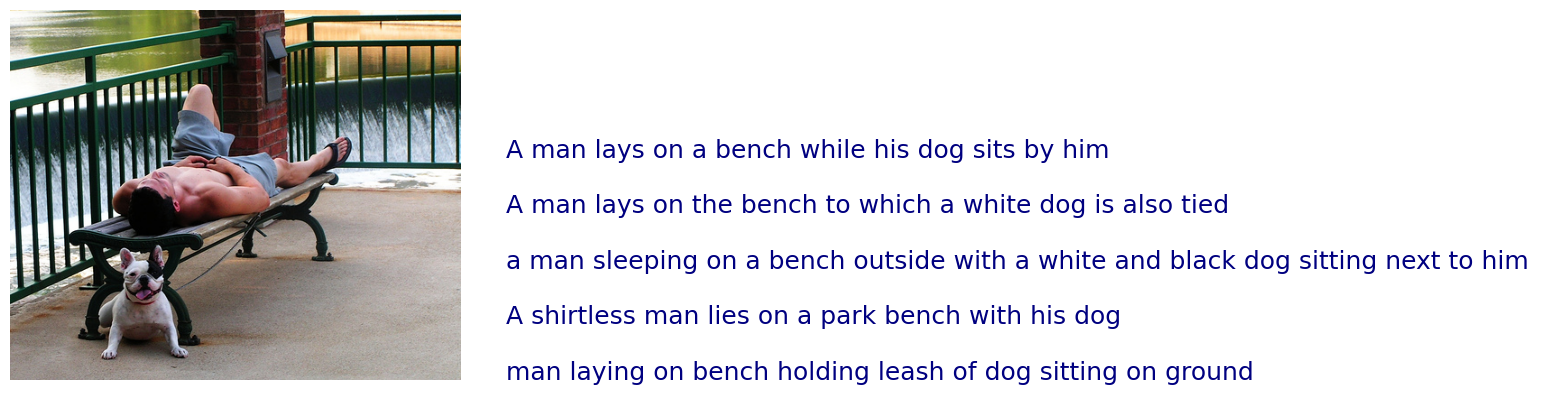

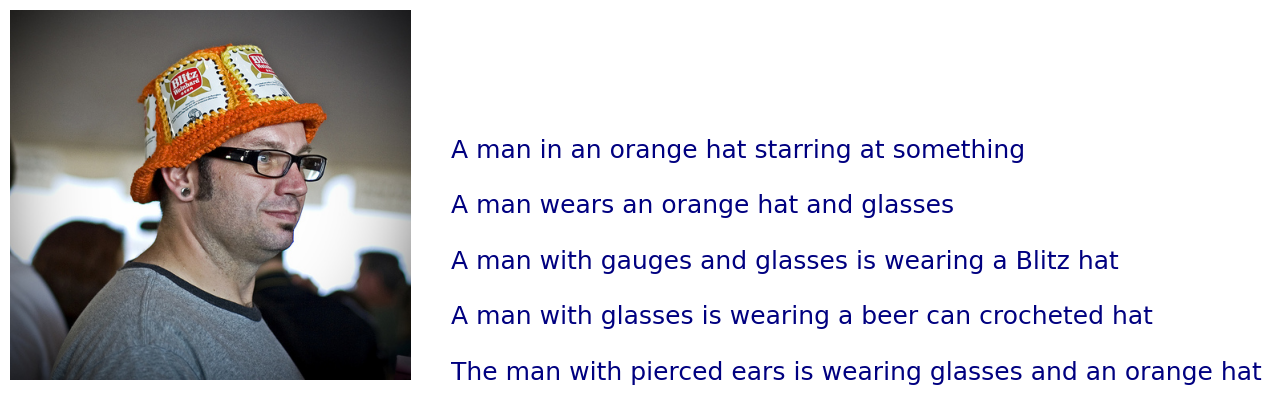

In [18]:
def execute_img_capt(start, end, frame) :
  for r in range(start, end) :
    caption_with_img_plot(frame.ID.drop_duplicates().iloc[r], frame)

execute_img_capt(0, 5, df)  

In [19]:
#data cleaning
rem_punct = str.maketrans('', '', string.punctuation)
for r in range(len(annotations)) :
  line = annotations[r]
  line = line.split()

  # converting to lowercase
  line = [word.lower() for word in line]

  # remove punctuation from each caption and hanging letters
  line = [word.translate(rem_punct) for word in line]
  line = [word for word in line if len(word) > 1]

  # remove numeric values
  line = [word for word in line if word.isalpha()]

  annotations[r] = ' '.join(line)

In [20]:
#add the <start> & <end> token to all those captions as well
annotations = ['<start>' + ' ' + line + ' ' + '<end>' for line in annotations]

#Create a list which contains all the path to the images
all_img_path = all_img_vector

In [21]:
annotations[0:5]

['<start> child in pink dress is climbing up set of stairs in an entry way <end>',
 '<start> girl going into wooden building <end>',
 '<start> little girl climbing into wooden playhouse <end>',
 '<start> little girl climbing the stairs to her playhouse <end>',
 '<start> little girl in pink dress going into wooden cabin <end>']

In [22]:
# create the tokenizer

#your code here

top_word_cnt = 5000
tokenizer = Tokenizer(num_words = top_word_cnt+1, filters= '!"#$%^&*()_+.,:;-?/~`{}[]|\=@ ',
                      lower = True, char_level = False, 
                      oov_token = 'UNK')

In [23]:
# Create word-to-index and index-to-word mappings.

#your code here

tokenizer.fit_on_texts(annotations)

#transform each text into a sequence of integers
train_seqs = tokenizer.texts_to_sequences(annotations)

In [24]:
# we add PAD token for zero

tokenizer.word_index['PAD'] = 0
tokenizer.index_word[0] = 'PAD'

In [25]:
print(tokenizer.oov_token)
print(tokenizer.index_word[0])

UNK
PAD


In [26]:
tokenizer.index_word

{1: 'UNK',
 2: '<start>',
 3: '<end>',
 4: 'in',
 5: 'the',
 6: 'on',
 7: 'is',
 8: 'and',
 9: 'dog',
 10: 'with',
 11: 'man',
 12: 'of',
 13: 'two',
 14: 'white',
 15: 'black',
 16: 'boy',
 17: 'are',
 18: 'woman',
 19: 'girl',
 20: 'to',
 21: 'wearing',
 22: 'people',
 23: 'at',
 24: 'water',
 25: 'young',
 26: 'red',
 27: 'brown',
 28: 'an',
 29: 'his',
 30: 'blue',
 31: 'dogs',
 32: 'running',
 33: 'through',
 34: 'playing',
 35: 'while',
 36: 'down',
 37: 'little',
 38: 'shirt',
 39: 'standing',
 40: 'ball',
 41: 'grass',
 42: 'person',
 43: 'child',
 44: 'snow',
 45: 'jumping',
 46: 'over',
 47: 'three',
 48: 'front',
 49: 'sitting',
 50: 'small',
 51: 'field',
 52: 'up',
 53: 'holding',
 54: 'large',
 55: 'group',
 56: 'by',
 57: 'green',
 58: 'yellow',
 59: 'children',
 60: 'walking',
 61: 'men',
 62: 'her',
 63: 'into',
 64: 'beach',
 65: 'air',
 66: 'near',
 67: 'jumps',
 68: 'mouth',
 69: 'street',
 70: 'runs',
 71: 'for',
 72: 'another',
 73: 'riding',
 74: 'from',
 75: 'it

In [27]:
# Create a word count of your tokenizer to visualize the Top 30 occuring words after text processing

#your code here
tokenizer_top_words = [word for line in annotations for word in line.split() ]

#tokenizer_top_words_count
tokenizer_top_words_count = collections.Counter(tokenizer_top_words)
tokenizer_top_words_count

Counter({'<start>': 40455,
         '<end>': 40455,
         'in': 18182,
         'the': 17676,
         'on': 10367,
         'is': 9069,
         'and': 8057,
         'dog': 7956,
         'with': 7308,
         'man': 7164,
         'of': 6496,
         'two': 5546,
         'white': 3710,
         'black': 3627,
         'boy': 3534,
         'are': 3365,
         'woman': 3320,
         'girl': 3284,
         'to': 3005,
         'wearing': 2917,
         'people': 2837,
         'at': 2819,
         'water': 2676,
         'young': 2610,
         'red': 2553,
         'brown': 2471,
         'an': 2358,
         'his': 2255,
         'blue': 2125,
         'dogs': 2097,
         'running': 1996,
         'through': 1979,
         'playing': 1954,
         'while': 1818,
         'down': 1755,
         'little': 1750,
         'shirt': 1735,
         'standing': 1703,
         'ball': 1678,
         'grass': 1565,
         'person': 1521,
         'child': 1517,
         'snow':

<start> :  40455
<end> :  40455
in :  18182
the :  17676
on :  10367
is :  9069
and :  8057
dog :  7956
with :  7308
man :  7164
of :  6496
two :  5546
white :  3710
black :  3627
boy :  3534
are :  3365
woman :  3320
girl :  3284
to :  3005
wearing :  2917
people :  2837
at :  2819
water :  2676
young :  2610
red :  2553
brown :  2471
an :  2358
his :  2255
blue :  2125
dogs :  2097


ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

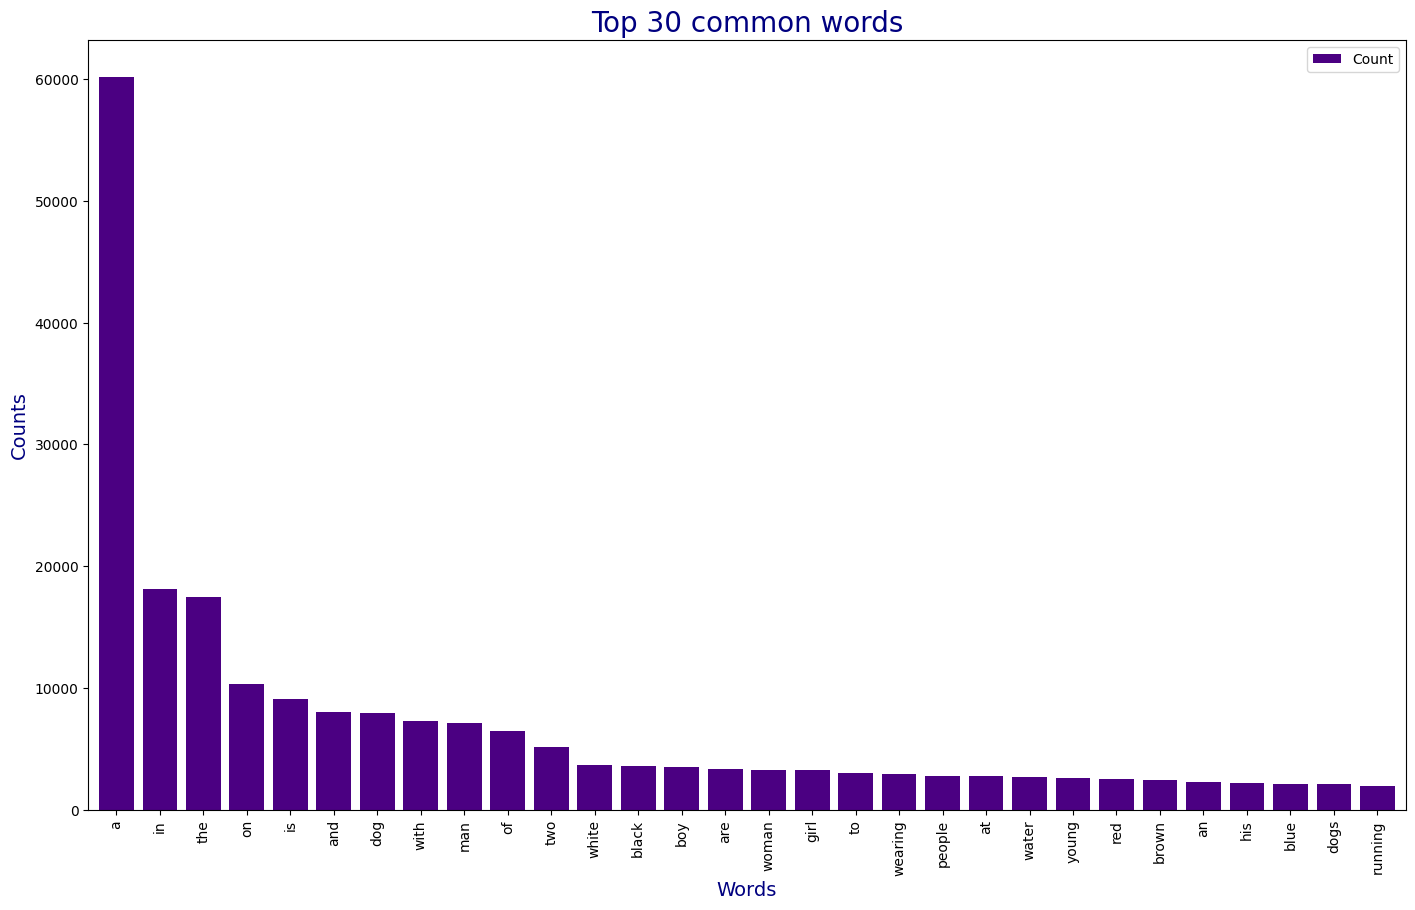

In [28]:
for word, count in tokenizer_top_words_count.most_common(30) :
  print(word, ": ", count)

tokens = tokenizer_top_words_count.most_common(30)
most_com_words_df = pd.DataFrame(tokens, columns = ['Word', 'Count'])

#plot 30 most common words
most_common_words_df.plot.bar(x = 'Word', y= 'Count', width=0.8, color = 'indigo', figsize = (17, 10))
plt.title('Top 30 common words', fontsize =20, color= 'navy')
plt.xlabel('Words', fontsize =14, color= 'navy')
plt.ylabel('Counts', fontsize =14, color= 'navy')
plt.grid(b=None)

In [ ]:
wordcloud_token = WordCloud(width = 1000, height = 500).generate_from_frequencies(tokenizer_top_words_count)
plt.figure(figsize = (12, 8))
plt.imshow(wordcloud_token)
plt.grid(b = None)

In [29]:
#store the length of all lists
train_seqs_len = [len(seq) for seq in train_seqs]

#store elements from list with maximum value
longest_word_length = max(train_seqs_len)

#calculate longest word_length and pads all sequences to equal length as that of the longest.
cap_vector= tf.keras.preprocessing.sequence.pad_sequences(train_seqs, padding= 'post', maxlen = longest_word_length,
                                                          dtype='int32', value=0)

print("The shape of Caption vector is :" + str(cap_vector.shape))

The shape of Caption vector is :(40455, 31)


In [30]:
# creating list to store preprocessed images and setting up the Image Shape

preprocessed_image = []
IMAGE_SHAPE = (299, 299)

In [31]:
tf.keras.backend.image_data_format()

'channels_last'

In [32]:
for img in all_imgs[0:5] :
    img = tf.io.read_file(img, name=None)

    # we need to decode jpeg encoded images (here by default channels = 0)
    img = tf.image.decode_jpeg(img, channels=0)
    img = tf.image.resize(img, (299, 299))
    img = tf.keras.applications.inception_v3.preprocess_input(img)

    #append preprocessed images to the list
    preprocessed_image.append(img)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)
Shape after resize :  (299, 299, 3)


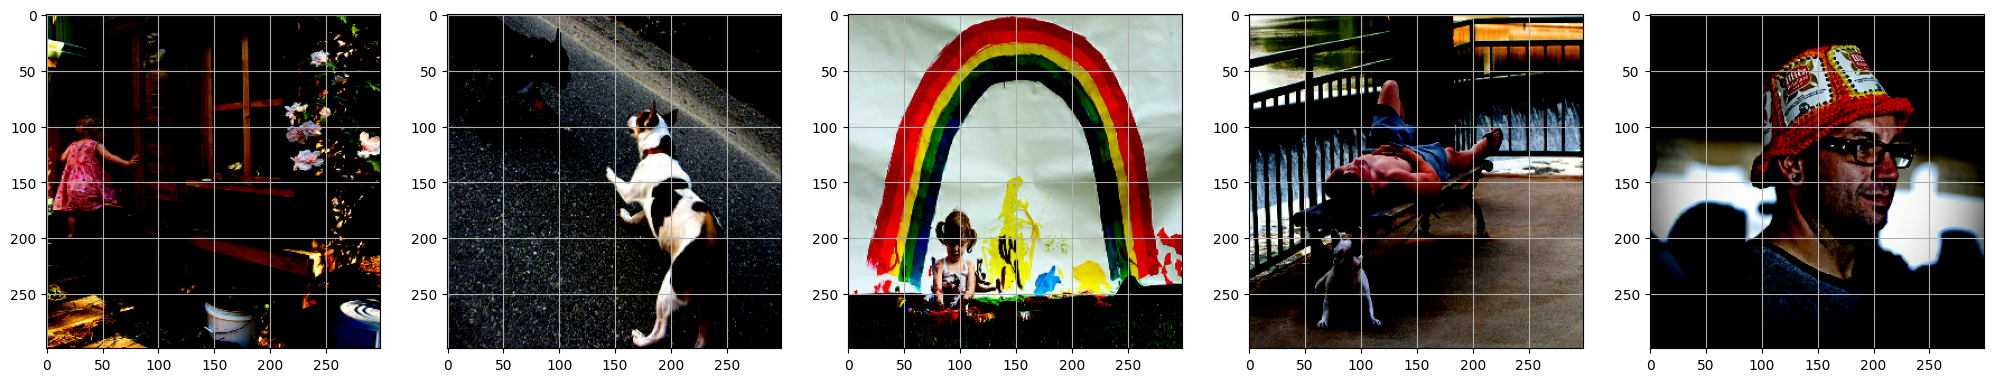

In [33]:
Display_Images = preprocessed_image[0:5]
figure, axes = plt.subplots(1,5)
figure.set_figwidth(25)

for ax, image in zip(axes, Display_Images) :
  print('Shape after resize : ', image.shape)
  ax.imshow(image)
  ax.grid('off')

In [34]:
def load_images(image_path) :
  img = tf.io.read_file(image_path, name = None)
  img = tf.image.decode_jpeg(img, channels=0)
  img = tf.image.resize(img, IMAGE_SHAPE)
  img = tf.keras.applications.inception_v3.preprocess_input(img)
  return img, image_path

In [35]:
all_img_vector

['/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1002674143_1b742ab4b8.jpg',
 '/Users/Flickr8k_Dataset/Flicker8k_Dataset/1002674143_1b742ab4b

In [36]:
training_list = sorted(set(all_img_vector))

#create a new dataset from above training list
New_Img = tf.data.Dataset.from_tensor_slices(training_list)

#map load_images function across the elements of the new dataset above
New_Img = New_Img.map(load_images, num_parallel_calls = tf.data.experimental.AUTOTUNE)
#Note  : Here, num_parallel_calls = tf.data.experimental.AUTOTUNE sets the number of parallel calls dynamically.
            ## based on the current GPU/CPU

#setting a batch size of 64
New_Img = New_Img.batch(64, drop_remainder=False)
#Note : As we don't want to drop the last batch if it contains less than 64 elements, we set drop_remainder to false

In [37]:
New_Img

<_BatchDataset element_spec=(TensorSpec(shape=(None, 299, 299, None), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.string, name=None))>

In [38]:
#Ratio = 80:20 and we will set random state = 42

path_train, path_test, caption_train, caption_test = train_test_split(all_img_vector, cap_vector, test_size = 0.2, random_state = 42)

In [39]:
print("Training data for images: " + str(len(path_train)))
print("Testing data for images: " + str(len(path_test)))
print("Training data for Captions: " + str(len(caption_train)))
print("Testing data for Captions: " + str(len(caption_test)))

Training data for images: 32364
Testing data for images: 8091
Training data for Captions: 32364
Testing data for Captions: 8091


In [40]:
image_model = tf.keras.applications.InceptionV3(include_top=False,weights='imagenet')

new_input = image_model.input #write code here to get the input of the image_model
hidden_layer = image_model.layers[-1].output  #write code here to get the output of the image_model

#build the final model using both input & output layer
image_features_extract_model = tf.compat.v1.keras.Model(new_input, hidden_layer)

In [41]:
# write the code to apply the feature_extraction model to your earlier created dataset which contained images & their respective paths
# Once the features are created, you need to reshape them such that feature shape is in order of (batch_size, 8*8, 2048)

image_features_extract_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None, None, 3)]      0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, None, None, 32)       864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, None, None, 32)       96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, None, None, 32)       0         ['batch_normalization[0][0

 conv2d_11 (Conv2D)          (None, None, None, 32)       6144      ['average_pooling2d[0][0]']   
                                                                                                  
 batch_normalization_5 (Bat  (None, None, None, 64)       192       ['conv2d_5[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_7 (Bat  (None, None, None, 64)       192       ['conv2d_7[0][0]']            
 chNormalization)                                                                                 
                                                                                                  
 batch_normalization_10 (Ba  (None, None, None, 96)       288       ['conv2d_10[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_17 (Activation)  (None, None, None, 96)       0         ['batch_normalization_17[0][0]
                                                                    ']                            
                                                                                                  
 activation_18 (Activation)  (None, None, None, 64)       0         ['batch_normalization_18[0][0]
                                                                    ']                            
                                                                                                  
 mixed1 (Concatenate)        (None, None, None, 288)      0         ['activation_12[0][0]',       
                                                                     'activation_14[0][0]',       
                                                                     'activation_17[0][0]',       
          

                                                                                                  
 conv2d_28 (Conv2D)          (None, None, None, 96)       55296     ['activation_27[0][0]']       
                                                                                                  
 batch_normalization_28 (Ba  (None, None, None, 96)       288       ['conv2d_28[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_28 (Activation)  (None, None, None, 96)       0         ['batch_normalization_28[0][0]
                                                                    ']                            
                                                                                                  
 conv2d_26 (Conv2D)          (None, None, None, 384)      995328    ['mixed2[0][0]']              
          

 conv2d_30 (Conv2D)          (None, None, None, 192)      147456    ['mixed3[0][0]']              
                                                                                                  
 conv2d_33 (Conv2D)          (None, None, None, 192)      172032    ['activation_32[0][0]']       
                                                                                                  
 conv2d_38 (Conv2D)          (None, None, None, 192)      172032    ['activation_37[0][0]']       
                                                                                                  
 conv2d_39 (Conv2D)          (None, None, None, 192)      147456    ['average_pooling2d_3[0][0]'] 
                                                                                                  
 batch_normalization_30 (Ba  (None, None, None, 192)      576       ['conv2d_30[0][0]']           
 tchNormalization)                                                                                
          

                                                                    ']                            
                                                                                                  
 average_pooling2d_4 (Avera  (None, None, None, 768)      0         ['mixed4[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_40 (Conv2D)          (None, None, None, 192)      147456    ['mixed4[0][0]']              
                                                                                                  
 conv2d_43 (Conv2D)          (None, None, None, 192)      215040    ['activation_42[0][0]']       
                                                                                                  
 conv2d_48 (Conv2D)          (None, None, None, 192)      215040    ['activation_47[0][0]']       
          

                                                                                                  
 activation_52 (Activation)  (None, None, None, 160)      0         ['batch_normalization_52[0][0]
                                                                    ']                            
                                                                                                  
 activation_57 (Activation)  (None, None, None, 160)      0         ['batch_normalization_57[0][0]
                                                                    ']                            
                                                                                                  
 average_pooling2d_5 (Avera  (None, None, None, 768)      0         ['mixed5[0][0]']              
 gePooling2D)                                                                                     
                                                                                                  
 conv2d_50

 batch_normalization_62 (Ba  (None, None, None, 192)      576       ['conv2d_62[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_67 (Ba  (None, None, None, 192)      576       ['conv2d_67[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_62 (Activation)  (None, None, None, 192)      0         ['batch_normalization_62[0][0]
                                                                    ']                            
                                                                                                  
 activation_67 (Activation)  (None, None, None, 192)      0         ['batch_normalization_67[0][0]
          

                                                                                                  
 conv2d_71 (Conv2D)          (None, None, None, 320)      552960    ['activation_70[0][0]']       
                                                                                                  
 conv2d_75 (Conv2D)          (None, None, None, 192)      331776    ['activation_74[0][0]']       
                                                                                                  
 batch_normalization_71 (Ba  (None, None, None, 320)      960       ['conv2d_71[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 batch_normalization_75 (Ba  (None, None, None, 192)      576       ['conv2d_75[0][0]']           
 tchNormalization)                                                                                
          

                                                                                                  
 activation_82 (Activation)  (None, None, None, 384)      0         ['batch_normalization_82[0][0]
                                                                    ']                            
                                                                                                  
 activation_83 (Activation)  (None, None, None, 384)      0         ['batch_normalization_83[0][0]
                                                                    ']                            
                                                                                                  
 batch_normalization_84 (Ba  (None, None, None, 192)      576       ['conv2d_84[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activatio

                                                                                                  
 activation_88 (Activation)  (None, None, None, 384)      0         ['batch_normalization_88[0][0]
                                                                    ']                            
                                                                                                  
 activation_91 (Activation)  (None, None, None, 384)      0         ['batch_normalization_91[0][0]
                                                                    ']                            
                                                                                                  
 activation_92 (Activation)  (None, None, None, 384)      0         ['batch_normalization_92[0][0]
                                                                    ']                            
                                                                                                  
 batch_nor

In [42]:
img_features = {}
for image, image_path in tqdm(New_Img) :
  # we are using tqdm for progress bar

  # feed images from newly created Dataset above to Inception V3 built above
  batch_features = image_features_extract_model(image)
  #squeeze out the features in a batch
  batch_features_flattened = tf.reshape(batch_features, (batch_features.shape[0], -1, batch_features.shape[3]))

  for batch_feat, path in zip(batch_features_flattened, image_path) :
    feature_path = path.numpy().decode('utf-8')
    img_features[feature_path] = batch_feat.numpy()

100%|██████████| 127/127 [07:57<00:00,  3.76s/it]


In [43]:
batch_features

<tf.Tensor: shape=(27, 8, 8, 2048), dtype=float32, numpy=
array([[[[0.00000000e+00, 7.74662197e-02, 0.00000000e+00, ...,
          2.31837645e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          1.07787728e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 1.94033504e-01, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 1.85754776e-01],
         ...,
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          9.42662954e-02, 0.00000000e+00, 5.05790830e-01],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
          0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],

        [[0.00000000e+00, 4.23005670e-01, 1.34464502e-02, ...,
          2.33669966e-01, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         

In [44]:
len(img_features)

8091

In [45]:
batch_feat.shape

TensorShape([64, 2048])

In [46]:
#view top five items of img_features dict
import more_itertools
top_5 = more_itertools.take(5, img_features.items())

top_5

[('/Users/Flickr8k_Dataset/Flicker8k_Dataset/1000268201_693b08cb0e.jpg',
  array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
          0.16987033],
         [0.        , 0.        , 1.0105923 , ..., 0.        , 0.        ,
          0.06111681],
         ...,
         [0.        , 0.        , 2.038045  , ..., 1.2029712 , 0.        ,
          1.992414  ],
         [0.        , 0.        , 0.9046917 , ..., 0.        , 0.        ,
          0.        ],
         [0.        , 1.2527282 , 0.        , ..., 0.        , 0.        ,
          0.        ]], dtype=float32)),
 ('/Users/Flickr8k_Dataset/Flicker8k_Dataset/1001773457_577c3a7d70.jpg',
  array([[0.        , 0.6636802 , 0.46286002, ..., 0.        , 0.        ,
          3.3322637 ],
         [0.        , 1.226817  , 0.        , ..., 0.        , 0.25390273,
          3.3295367 ],
         [1.2881975 , 1.5195404 , 0.  

In [47]:
#to provide, both images along with the captions as input
def map(image_name, caption):
    
    # your code goes here to create the dataset & transform it
    
    img_tensor = img_features[image_name.decode('utf-8')]
    return img_tensor, caption

In [48]:
# create a builder function to create dataset which takes in the image path & captions as input
# This function should transform the created dataset(img_path,cap) to (features,cap) using the map_func created earlier

BUFFER_SIZE = 1000
BATCH_SIZE = 64
def gen_dataset(img, capt):
    
    # your code goes here to create the dataset & transform it
    
    data = tf.data.Dataset.from_tensor_slices((img, capt))
    # dataset created using tf.data.Dataset.from_tensor_slices
    data = data.map(lambda ele1, ele2 : tf.numpy_function(map, [ele1, ele2], [tf.float32, tf.int32]),
                    num_parallel_calls = tf.data.experimental.AUTOTUNE)
    
     
    data = (data.shuffle(BUFFER_SIZE, reshuffle_each_iteration= True).batch(BATCH_SIZE, drop_remainder = False)
    .prefetch(tf.data.experimental.AUTOTUNE))
    # .prefetch() is used to prepare all upcoming elements, while current elements are being processed
    # We set reshuffle_each_iteration set to True in order to ensure different order per epoch
    # Also,  drop_remainder is set to False as we don't want to miss out any element if the last batch contains less than 64 elements

    return data

In [49]:
train_dataset = gen_dataset(path_train,caption_train)
test_dataset = gen_dataset(path_test,caption_test)

In [50]:
sample_img_batch, sample_cap_batch = next(iter(train_dataset))
print(sample_img_batch.shape)  #(batch_size, 8*8, 2048)
print(sample_cap_batch.shape) 

(64, 64, 2048)
(64, 31)


In [51]:
embedding_dim = 256 
units = 512

#top 5,000 words +1
vocab_size = 5001
train_num_steps = len(path_train) // BATCH_SIZE #len(total train images) // BATCH_SIZE
test_num_steps = len(path_test) // BATCH_SIZE  #len(total test images) // BATCH_SIZE

max_length = 31
feature_shape = batch_feat.shape[1]
attention_feature_shape = batch_feat.shape[0]

In [52]:
tf.compat.v1.reset_default_graph()
print(tf.compat.v1.get_default_graph())

In [53]:
#Building Encoder using CNN Keras subclassing method

class Encoder(Model):
    def __init__(self,embed_dim):
        super(Encoder, self).__init__()
        self.dense = tf.keras.layers.Dense(embed_dim) #build your Dense layer with relu activation
        
    def call(self, features):
        features =  self.dense(features) # extract the features from the image shape: (batch, 8*8, embed_dim)
        features =  tf.keras.activations.relu(features, alpha=0.01, max_value=None, threshold=0)
        return features

In [54]:
encoder=Encoder(embedding_dim)

In [55]:




tf.keras.utils.plot_model
#plot_model(encoder, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

<function keras.src.utils.vis_utils.plot_model(model, to_file='model.png', show_shapes=False, show_dtype=False, show_layer_names=True, rankdir='TB', expand_nested=False, dpi=96, layer_range=None, show_layer_activations=False, show_trainable=False)>

In [56]:
class Attention_model(Model):
    def __init__(self, units):
        super(Attention_model, self).__init__()
        self.W1 = tf.keras.layers.Dense(units) #build your Dense layer
        self.W2 = tf.keras.layers.Dense(units) #build your Dense layer
        self.V = tf.keras.layers.Dense(1) #build your final Dense layer with unit 1
        self.units=units

    def call(self, features, hidden):
        # features shape: (batch_size, 8*8, embedding_dim)
        # hidden shape: (batch_size, hidden_size)

        # Expand the hidden shape to shape: (batch_size, 1, hidden_size)
        hidden_with_time_axis = hidden[:, tf.newaxis]

        # build your score funciton to shape: (batch_size, 8*8, units)
        score = tf.keras.activations.tanh(self.W1(features) + self.W2(hidden_with_time_axis))  

        # extract your attention weights with shape: (batch_size, 8*8, 1)
        attention_weights = tf.keras.activations.softmax(self.V(score), axis=1) 

        #shape: create the context vector with shape (batch_size, 8*8,embedding_dim)
        context_vector = attention_weights * features 

        # reduce the shape to (batch_size, embedding_dim)
        context_vector = tf.reduce_sum(context_vector, axis=1)  
        
        return context_vector, attention_weights

In [57]:
class Decoder(Model):
    def __init__(self, embed_dim, units, vocab_size):
        super(Decoder, self).__init__()
        self.units=units
        self.attention = Attention_model(self.units) #iniitalise your Attention model with units
        self.embed = tf.keras.layers.Embedding(vocab_size, embed_dim) #build your Embedding layer
        self.gru = tf.keras.layers.GRU(self.units,return_sequences=True,return_state=True,recurrent_initializer='glorot_uniform')
        self.d1 = tf.keras.layers.Dense(self.units) #build your Dense layer
        self.d2 = tf.keras.layers.Dense(vocab_size) #build your Dense layer
        

    def call(self,x,features, hidden):
        context_vector, attention_weights = self.attention(features, hidden) #create your context vector & attention weights from attention model
        embed = self.embed(x) # embed your input to shape: (batch_size, 1, embedding_dim)
        embed = tf.concat([tf.expand_dims(context_vector, 1), embed], axis = -1) # Concatenate your input with the context vector from attention layer. Shape: (batch_size, 1, embedding_dim + embedding_dim)
        output,state = self.gru(embed) # Extract the output & hidden state from GRU layer. Output shape : (batch_size, max_length, hidden_size)
        output = self.d1(output)
        output = tf.reshape(output, (-1, output.shape[2])) # shape : (batch_size * max_length, hidden_size)
        output = self.d2(output) # shape : (batch_size * max_length, vocab_size)
        
        return output, state, attention_weights
    
    def init_state(self, batch_size):
        return tf.zeros((batch_size, self.units))

In [58]:
decoder=Decoder(embedding_dim, units, vocab_size)

In [59]:
features=encoder(sample_img_batch)

hidden = decoder.init_state(batch_size=sample_cap_batch.shape[0])
dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * sample_cap_batch.shape[0], 1)

predictions, hidden_out, attention_weights= decoder(dec_input, features, hidden)
print('Feature shape from Encoder: {}'.format(features.shape)) #(batch, 8*8, embed_dim)
print('Predcitions shape from Decoder: {}'.format(predictions.shape)) #(batch,vocab_size)
print('Attention weights shape from Decoder: {}'.format(attention_weights.shape)) #(batch, 8*8, embed_dim)

Feature shape from Encoder: (64, 64, 256)
Predcitions shape from Decoder: (64, 5001)
Attention weights shape from Decoder: (64, 64, 1)


In [60]:
optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)  #define the optimizer
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True, reduction = tf.keras.losses.Reduction.NONE) #define your loss object

In [61]:
def loss_function(real, pred):
    mask = tf.math.logical_not(tf.math.equal(real, 0))
    loss_ = loss_object(real, pred)

    mask = tf.cast(mask, dtype=loss_.dtype)
    loss_ *= mask
    #loss is getting multiplied with mask to get an ideal shape
    
    return tf.reduce_mean(loss_)

In [62]:
checkpoint_path = "Flickr8K/checkpoint1"
ckpt = tf.train.Checkpoint(encoder=encoder,
                           decoder=decoder,
                           optimizer = optimizer)
ckpt_manager = tf.train.CheckpointManager(ckpt, checkpoint_path, max_to_keep=5)

In [63]:
start_epoch = 0
if ckpt_manager.latest_checkpoint:
    start_epoch = int(ckpt_manager.latest_checkpoint.split('-')[-1])

In [64]:
@tf.function
def train_step(img_tensor, target):
    loss = 0
    hidden = decoder.init_state(batch_size=target.shape[0])
    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    
    with tf.GradientTape() as tape:
        #write your code here to do the training steps
        encoder_op = encoder(img_tensor)

        #apply teacher forcing by passing target word as next input to the decoder
        for r in range(1, target.shape[1]) :
          #pass encoder_op to decoder
          predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
          loss = loss + loss_function(target[:, r], predictions) 
          dec_input = tf.expand_dims(target[:, r], 1)  

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))

    return loss, avg_loss

In [65]:
@tf.function
def test_step(img_tensor, target):
    loss = 0
    
    #write your code here to do the testing steps
    hidden = decoder.init_state(batch_size = target.shape[0])

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']] * target.shape[0], 1)
    with tf.GradientTape() as tape:
      encoder_op = encoder(img_tensor)

      #apply teacher forcing again
      for r in range(1, target.shape[1]) :
        #pass encoder_op to decoder
        predictions, hidden, _ = decoder(dec_input, encoder_op, hidden)
        loss = loss + loss_function(target[:, r], predictions)

        dec_input = tf.expand_dims(target[: , r], 1)

    avg_loss = (loss/ int(target.shape[1])) #avg loss per batch
    trainable_vars = encoder.trainable_variables + decoder.trainable_variables
    grad = tape.gradient (loss, trainable_vars) # calculating gradient wrt each trainable var

    #we will now compute the gradients and apply it to the optimizer while backpropagating
    optimizer.apply_gradients(zip(grad, trainable_vars))                      


    return loss, avg_loss

In [66]:
def test_loss_cal(test_dataset):
    total_loss = 0

    #write your code to get the average loss result on your test data
    for (batch, (img_tensor, target)) in enumerate(test_dataset) :
      batch_loss, t_loss = test_step(img_tensor, target)
      total_loss = total_loss + t_loss
      avg_test_loss = total_loss/ test_num_steps

    return avg_test_loss

In [ ]:
loss_plot = []
test_loss_plot = []
EPOCHS = 15

best_test_loss=100
for epoch in tqdm(range(0, EPOCHS)):
    start = time.time()
    total_loss = 0

    for (batch, (img_tensor, target)) in enumerate(train_dataset):
        batch_loss, t_loss = train_step(img_tensor, target)
        total_loss += t_loss
        avg_train_loss=total_loss / train_num_steps
        
    loss_plot.append(avg_train_loss)    
    test_loss = test_loss_cal(test_dataset)
    test_loss_plot.append(test_loss)
    
    print ('For epoch: {}, the train loss is {:.3f}, & test loss is {:.3f}'.format(epoch+1,avg_train_loss,test_loss))
    print ('Time taken for 1 epoch {} sec\n'.format(time.time() - start))
    
    if test_loss < best_test_loss:
        print('Test loss has been reduced from %.3f to %.3f' % (best_test_loss, test_loss))
        best_test_loss = test_loss
        ckpt_manager.save()

In [ ]:
from matplotlib.pyplot import figure
figure(figsize=(12, 8))
plt.plot(loss_plot, color='orange', label = 'training_loss_plot')
plt.plot(test_loss_plot, color='green', label = 'test_loss_plot')
plt.xlabel('Epochs', fontsize = 15, color = 'red')
plt.ylabel('Loss', fontsize = 15, color = 'red')
plt.title('Loss Plot', fontsize = 20, color = 'red')
plt.legend()
plt.show()

In [180]:
def evaluate(image):
    attention_plot = np.zeros((max_length, attention_feature_shape))

    hidden = decoder.init_state(batch_size=1)

    temp_input = tf.expand_dims(load_images(image)[0], 0) #process the input image to desired format before extracting features
    img_tensor_val = image_features_extract_model(temp_input) # Extract features using our feature extraction model
    img_tensor_val = tf.reshape(img_tensor_val, (img_tensor_val.shape[0], -1, img_tensor_val.shape[3]))

    features = encoder (img_tensor_val) # extract the features by passing the input to encoder

    dec_input = tf.expand_dims([tokenizer.word_index['<start>']], 0)
    result = []

    for i in range(max_length):
        predictions, hidden, attention_weights = decoder(dec_input, features, hidden) # get the output from decoder

        attention_plot[i] = tf.reshape(attention_weights, (-1, )).numpy()

        predicted_id = tf.argmax(predictions[0]).numpy() #extract the predicted id(embedded value) which carries the max value
        #map the id to the word from tokenizer and append the value to the result list
        result.append (tokenizer.index_word[predicted_id])

        if tokenizer.index_word[predicted_id] == '<end>':
            return result, attention_plot,predictions

        dec_input = tf.expand_dims([predicted_id], 0)

    attention_plot = attention_plot[:len(result), :]
    return result, attention_plot,predictions

In [181]:
def plot_attention_map (caption, weights, image) :

  fig = plt.figure(figsize = (10, 10))
  temp_img = np.array(Image.open(image))

  cap_len = len(caption)
  for cap in range(cap_len) :
    weights_img = np.reshape(weights[cap], (8,8))
    wweights_img = np.array(Image.fromarray(weights_img).resize((224,224), Image.LANCZOS))

    ax = fig.add_subplot(cap_len//2, cap_len//2, cap+1)
    ax.set_title(caption[cap], fontsize = 14, color = 'red')

    img = ax.imshow(temp_img)

    ax.imshow(weights_img, cmap='gist_heat', alpha=0.6, extent=img.get_extent())
    ax.axis('off')
  plt.subplots_adjust(hspace=0.2, wspace=0.2)
  plt.show()

In [182]:
from nltk.translate.bleu_score import sentence_bleu

In [183]:
def filt_text(text):
    filt=['<start>','<unk>','<end>'] 
    temp= text.split()
    [temp.remove(j) for k in filt for j in temp if k==j]
    text=' '.join(temp)
    return text

In [184]:
image_test = path_test.copy()

In [223]:
from deepface import DeepFace
import cv2
import matplotlib.pyplot as plt
from gtts import gTTS

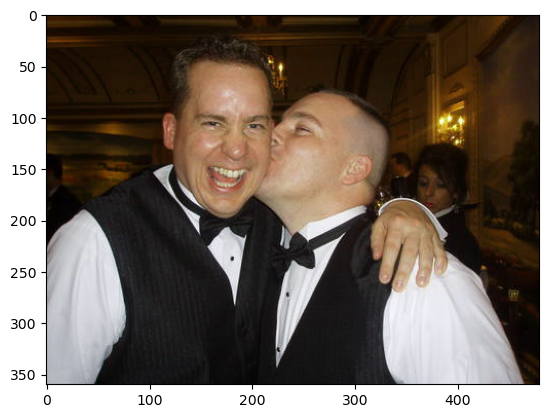

In [225]:
img1=cv2.imread(test_image)
plt.imshow(img1[:,:,::-1])
plt.show()


In [226]:
result=DeepFace.analyze(img1,actions=["emotion"])

result

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  7.52it/s]


[{'emotion': {'angry': 0.09376039379276335,
   'disgust': 2.847394853233709e-05,
   'fear': 0.009015649266075343,
   'happy': 94.35840249061584,
   'sad': 0.018557380826678127,
   'surprise': 0.11313896393403411,
   'neutral': 5.407094955444336},
  'dominant_emotion': 'happy',
  'region': {'x': 130, 'y': 67, 'w': 104, 'h': 104}},
 {'emotion': {'angry': 0.03325045505171478,
   'disgust': 1.703336161662117e-11,
   'fear': 0.1857017039040272,
   'happy': 84.86458478743849,
   'sad': 0.0019201638239607862,
   'surprise': 14.88053678042135,
   'neutral': 0.03400922692677104},
  'dominant_emotion': 'happy',
  'region': {'x': 204, 'y': 71, 'w': 137, 'h': 137}}]

In [227]:
dominant_emotion=result[0]['dominant_emotion']
print(dominant_emotion)

happy


In [228]:
import os
speech = gTTS('Dominant emotion : ' +dominant_emotion , lang = 'en', slow = False)
speech.save('voice.mp3')
audio_file = 'voice.mp3'
os.system('voice.mp3')

0

In [242]:

def pred_caption_audio(random, autoplay=False, weights=(0.5, 0.5, 0, 0)) :

    cap_test_data = caption_test.copy()
    rid = np.random.randint(0, random)
    test_image = r"C:\Users\Flickr8k_Dataset\Flicker8k_Dataset\133189853_811de6ab2a.jpg"
    #test_image = './images/413231421_43833a11f5.jpg'
    #real_caption = '<start> black dog is digging in the snow <end>'
    img1=cv2.imread(test_image)
    plt.imshow(img1[:,:,::-1])
    plt.show()
    result=DeepFace.analyze(img1,actions=["emotion"])

    print(result)
    import os
    speech = gTTS('Dominant emotion : ' +dominant_emotion , lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'
    os.system('voice.mp3')

    real_caption = ' '.join([tokenizer.index_word[i] for i in cap_test_data[rid] if i not in [0]])
    result, attention_plot, pred_test = evaluate(test_image)


    real_caption=filt_text(real_caption)      


    pred_caption=' '.join(result).rsplit(' ', 1)[0]


    real_appn = []
    real_appn.append(real_caption.split())
    reference = real_appn
    candidate = pred_caption.split()
    

    score = sentence_bleu(reference, candidate, weights=weights)#set your weights
    print(f"BLEU score: {score*100:.2f}%")
    print ('Real Caption:', real_caption)
    print ('Prediction Caption:', pred_caption)
    
    plot_attention_map(result, attention_plot, test_image)

    # we will make use of Google Text to Speech API (online), which will convert the caption to audio
    speech = gTTS('Predicted Caption : ' + pred_caption, lang = 'en', slow = False)
    speech.save('voice.mp3')
    audio_file = 'voice.mp3'

    display.display(display.Audio(audio_file, rate = None, autoplay = autoplay))
    return test_image


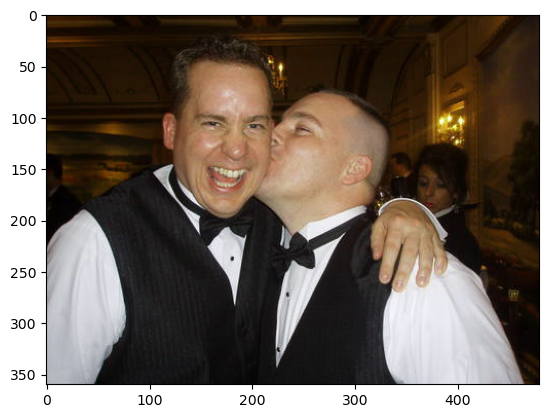

Action: emotion: 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]


[{'emotion': {'angry': 0.09376039379276335, 'disgust': 2.847394853233709e-05, 'fear': 0.009015649266075343, 'happy': 94.35840249061584, 'sad': 0.018557380826678127, 'surprise': 0.11313896393403411, 'neutral': 5.407094955444336}, 'dominant_emotion': 'happy', 'region': {'x': 130, 'y': 67, 'w': 104, 'h': 104}}, {'emotion': {'angry': 0.03325045505171478, 'disgust': 1.703336161662117e-11, 'fear': 0.1857017039040272, 'happy': 84.86458478743849, 'sad': 0.0019201638239607862, 'surprise': 14.88053678042135, 'neutral': 0.03400922692677104}, 'dominant_emotion': 'happy', 'region': {'x': 204, 'y': 71, 'w': 137, 'h': 137}}]
BLEU score: 0.00%
Real Caption: girl in black pants and an orange top jumping with one leg outstreached and foot pointed other in background dressed the same
Prediction Caption: man in tuxedo shirt and tie pose for the cheek by another man


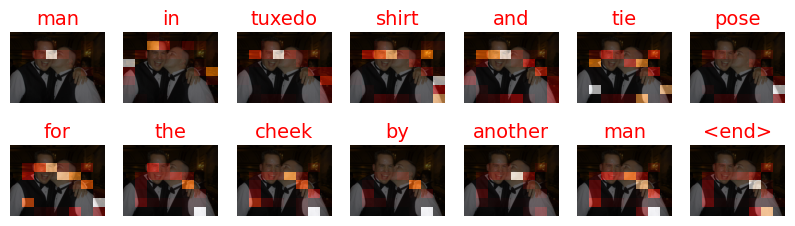

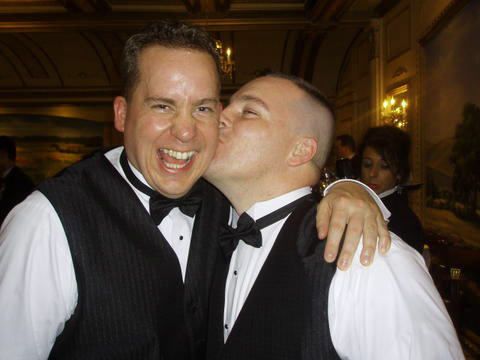

In [244]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

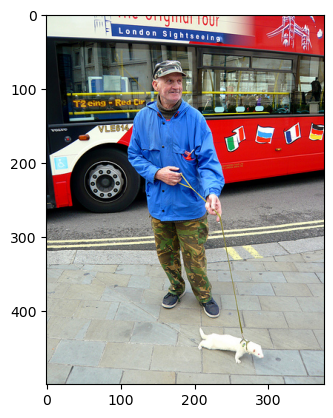

ValueError: Face could not be detected. Please confirm that the picture is a face photo or consider to set enforce_detection param to False.

In [234]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)

BLEU score: 100.0
Real Caption: group of children running in the grass
Prediction Caption: group of children running in the grass


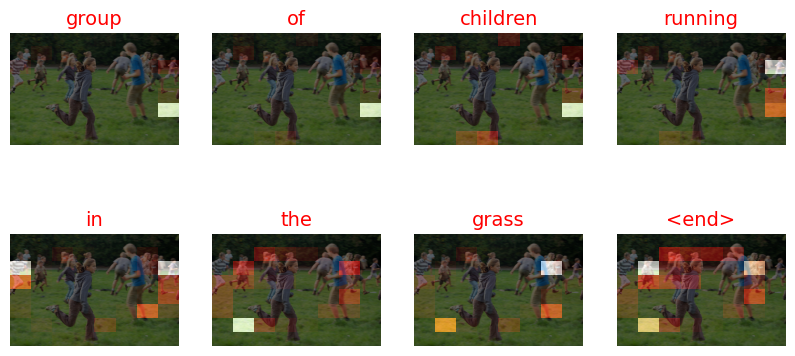

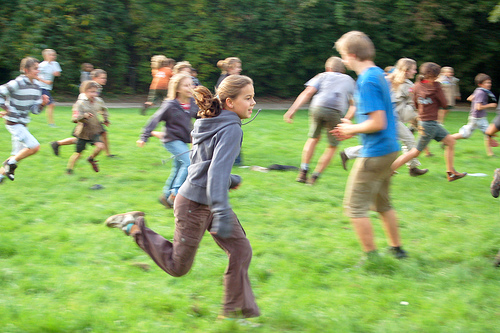

In [219]:
test_image = pred_caption_audio(len(image_test), True, weights = (0.5, 0.25, 0, 0))
Image.open(test_image)